In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/apple_quality.csv')
dataset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
x = dataset.iloc[:-1,1:8].values
y = dataset.iloc[:-1,8].values
x = np.asarray(x).astype('float32')
y_ = []
for i in y:
    if i=='good':
        y_.append(1)
    elif i=='bad':
        y_.append(0)
y = np.asarray(y_)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [4]:
def Neural_Network(activation_function):
    model = Sequential()
    model.add(Dense(12, input_shape=(7,), activation=activation_function))
    model.add(Dense(6, activation=activation_function))
    model.add(Dense(1, activation=activation_function))

    model.compile(loss='binary_crossentropy',  optimizer='adam',)

    return model

In [5]:
def New_Model(act_fun,x_train,y_train,x_test,y_test):
    model = Neural_Network(act_fun)
    model.fit(x_train, y_train, epochs=200, verbose=0)
    pred = model.predict(x_test)
    model_acc_score = accuracy_score(pred.round(),y_test)
    print("accuracy score for {} activation function: ".format(act_fun),model_acc_score)
    return model_acc_score

In [6]:
acc_scores = []
act_func = ['swish','linear','sigmoid','tanh','relu','softmax']

for af in act_func:
    acc_scores.append(New_Model(af,x_train,y_train,x_test,y_test))

32/32 [==============================] - 0s 964us/step
accuracy score for swish activation function:  0.759
32/32 [==============================] - 0s 563us/step
accuracy score for linear activation function:  0.749
32/32 [==============================] - 0s 579us/step
accuracy score for sigmoid activation function:  0.917
32/32 [==============================] - 0s 547us/step
accuracy score for tanh activation function:  0.772
32/32 [==============================] - 0s 852us/step
accuracy score for relu activation function:  0.757
32/32 [==============================] - 0s 873us/step
accuracy score for softmax activation function:  0.505


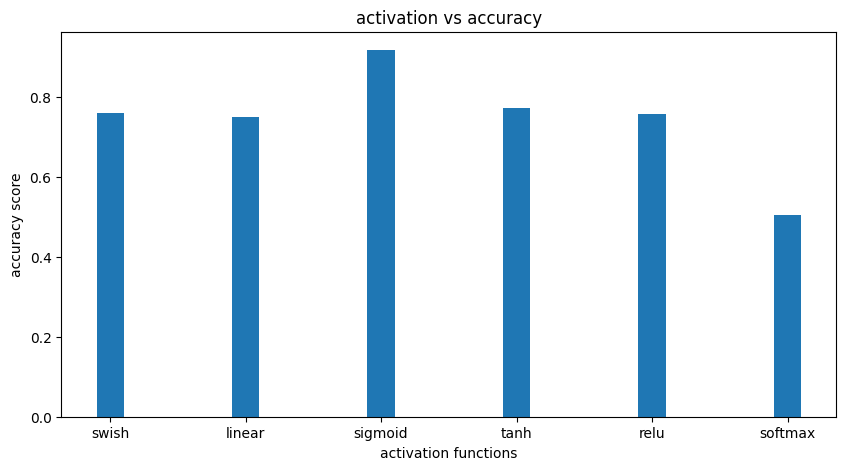

In [7]:
fig = plt.figure(figsize = (10,5))
plt.bar(act_func, acc_scores, width=0.2)
plt.xlabel("activation functions")
plt.ylabel("accuracy score")
plt.title("activation vs accuracy")
plt.show()